## Decision Trees
#### 1. Load a dataset and build a Tree Classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# data_train = pd.read_csv("Training.csv")
# data_test = pd.read_csv("Test.csv")

data_train = pd.read_csv("Training_unbalanced.csv")
data_test = pd.read_csv("Test_unbalanced.csv")

X_train = data_train[['Feature1', 'Feature2']]
Y_train = data_train['Label']
X_test = data_test[['Feature1', 'Feature2']]
Y_test = data_test['Label']

In [3]:
aTreeClassifier = tree.DecisionTreeClassifier(max_depth=5)
aTreeClassifier = aTreeClassifier.fit(X_train, Y_train)
Y_pred = aTreeClassifier.predict( X_test )

print( 'Accuracy = ', sum( Y_pred == Y_test ) / len( Y_test ) )

Accuracy =  0.92


In [4]:
X_test.head()

,Feature1,Feature2
0,0.337248,3.053083
1,1.099563,-0.716812
2,2.570034,2.240845
3,1.916787,1.416711
4,1.715009,2.213556


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


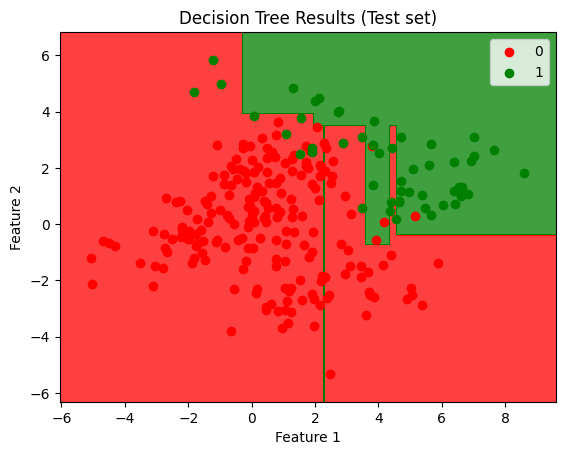

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature1'].min()-1, stop= X_test['Feature1'].max()+1, step = 0.01), np.arange(start = X_test['Feature2'].min()-1, stop= X_test['Feature2'].max()+1, step = 0.01))
plt.contourf(X1, X2, aTreeClassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Decision Tree Results (Test set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

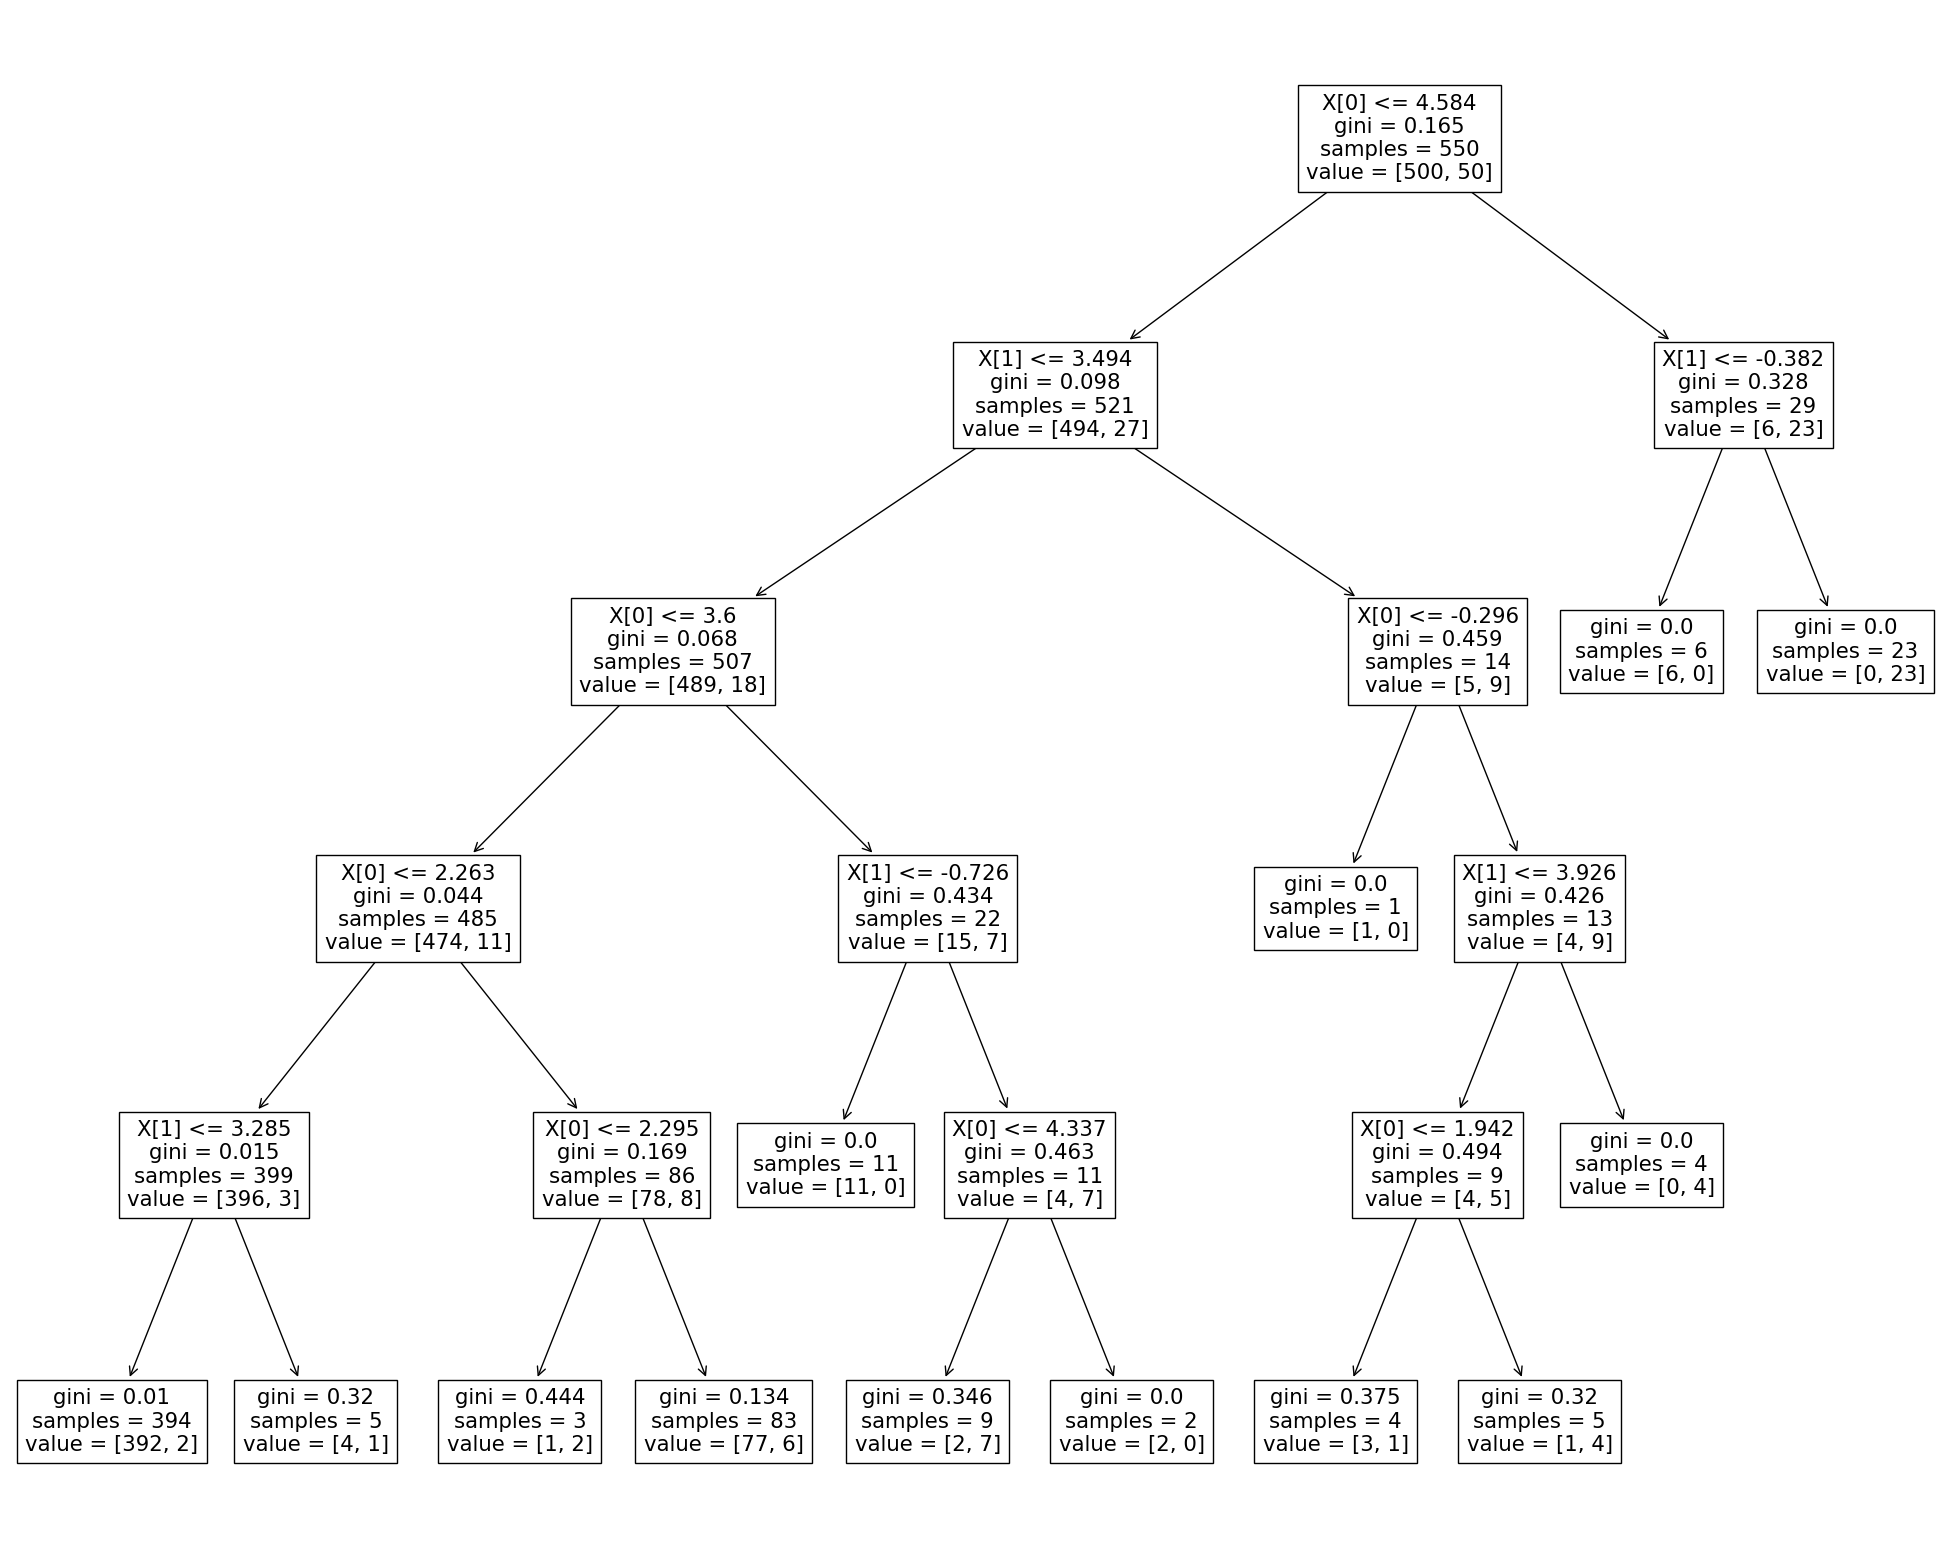

In [6]:
# Visualize the learned tree
fig = plt.figure(figsize=(25,20))
textoutput = tree.plot_tree( aTreeClassifier )

In [7]:
# Another way to visualize the learned tree.
# tree.plot_tree( aTreeClassifier )

import graphviz 
# If you don't have graphviz, run "pip3 install graphviz" to install it.

dot_data = tree.export_graphviz(aTreeClassifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render('aTree') 
# The visualization of the graph will be dumped into "treeC.pdf". The tree is also saved in a text file "treeC".


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### 2. Performance Evaluation

##### 2.1 Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

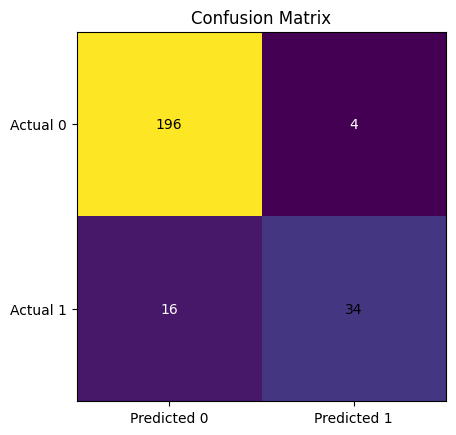

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

##### 2.2 ROC and AUC

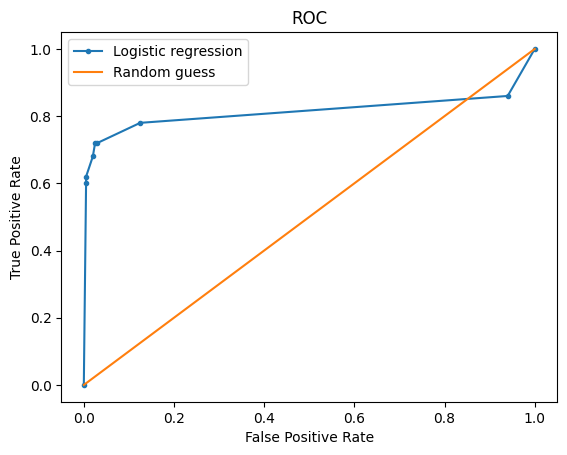

AUC = 0.8137000000000001


In [9]:
from sklearn import metrics
import scipy.stats as stats # If you don't have scipy, install it now.

Y_pred_proba = aTreeClassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
plt.plot(fpr,tpr, marker='.', label='Logistic regression')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Random guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title ('ROC')
plt.show()

print( 'AUC =', metrics.auc(fpr, tpr))

##### 2.3 Get a summary report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.925     0.980     0.951       200
           1      0.895     0.680     0.773        50

    accuracy                          0.920       250
   macro avg      0.910     0.830     0.862       250
weighted avg      0.919     0.920     0.916       250



##### 2.4 Cross-Validation

In [11]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(tree.DecisionTreeClassifier(), X=X_train, y=Y_train, cv=10, return_train_score=True, scoring=('f1', 'roc_auc') ) # check the 'scoring' options in https://scikit-learn.org/stable/modules/model_evaluation.html
# print( cv_results )
print( cv_results['train_f1'] )
print( cv_results['test_f1'] )
print( cv_results['train_roc_auc'] )
print( cv_results['test_roc_auc'] )


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.28571429 0.66666667 0.42857143 0.6        0.71428571 0.5
 0.72727273 0.44444444 0.66666667 0.66666667]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.63 0.95 0.74 0.78 0.96 0.69 0.88 0.68 0.79 0.79]


## Regression Trees

Text(0.5, 1.0, 'Simulated Data for K-NN Regression')

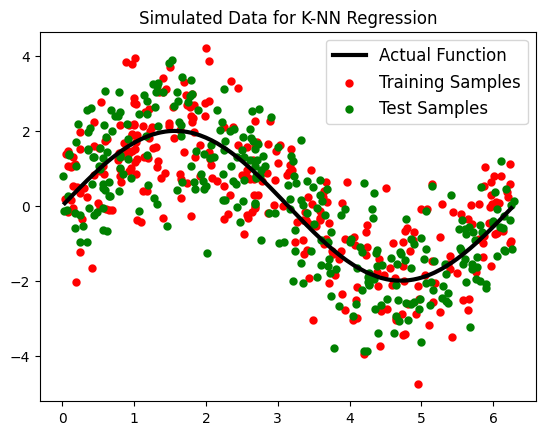

In [12]:
# First, let's simulate a simple dataset

# Use the current time stamp as the random seed for generating the dataset
import matplotlib.pyplot as plt
import time

np.random.seed(seed=int(time.time())) 

n = 300
x_train = np.random.uniform(0, 2*np.pi, n)
x_train = np.sort( x_train )
y_train = 2*np.sin( x_train ) + np.random.normal(size=n)

x_test = np.random.uniform(0, 2*np.pi, n)
x_test = np.sort( x_test )
y_test = 2*np.sin( x_test ) + np.random.normal(size=n)

plt.plot(x_train, 2*np.sin(x_train), color = 'black', label = 'Actual Function', linewidth=3)
plt.scatter(x_train, y_train, color = 'red', marker='.', label = 'Training Samples', linewidth=3)

plt.scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Samples', linewidth=3)
plt.legend(fontsize = 12)
plt.title( 'Simulated Data for K-NN Regression' )

RMSE = 1.5719796193327547


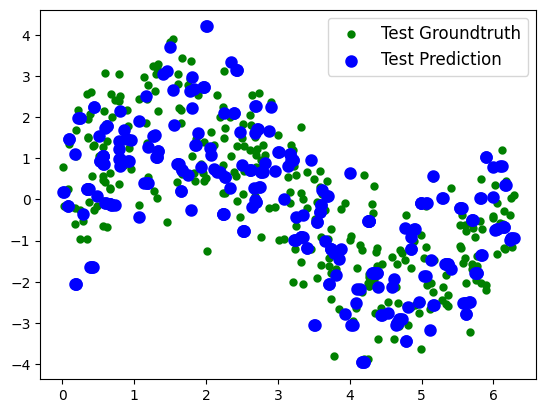

In [13]:
aTreeRegressor = tree.DecisionTreeRegressor()
aTreeRegressor = aTreeRegressor.fit(x_train.reshape(-1, 1), y_train)
y_pred_by_tree = aTreeRegressor.predict( x_test.reshape(-1, 1) )

plt.scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Groundtruth', linewidth=3)
plt.scatter(x_test, y_pred_by_tree, color = 'blue', marker='o', label = 'Test Prediction', linewidth=3)
plt.legend(fontsize = 12)

rmse = np.sqrt( np.mean( (y_pred_by_tree - y_test) ** 2 ) )
print( 'RMSE =', rmse )